# Molecular Transport Properties

This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 7 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated 19 February 2020.

The objectives of this tutorial are: to review essential aspects of molecular transport properties for ideal-gas mixtures; to go deeper into aspects including their temperature and pressure dependence, differential species diffusion, and important dimensionless parameters; and to show how to work with molecular transport properties for such mixtures in Cantera. The emphasis is mainly on species diffusion, although thermal conductivity and viscosity are also discussed. We will use the transport properties that are included in gri30.cti.

The reader should be familiar with the material in the Chapter 6 Notebooks before working through this Notebook.

## 1. A brief review of molecular transport properties

Molecular transport was introduced in Chapter 3 of Turns 4th ed., and we took an initial look at species binary diffusivities in tutorial Notebook 3_1_Vaporization_properties. The discussion of species diffusion is expanded in Chapter 7. The discussion covers both the transport properties for each individual species $i$ in a mixture containing $ N_{spec}$ different species, and mixture-averaged transport properties that are representative of the full gas mixture. Some key points are as follows:

* For viscosity and thermal conductivity, the fundamental quantity is the individual species value: $\mu _ i $ (species-$i$ dynamic viscosity) or $ k _ i $ (species-$i$ thermal conductivity). For an ideal gas, these depend only on temperature. For a gas mixture, various formulae have been proposed for the mixture viscosity $\mu$ and the mixture thermal conductivity $k$. For example, the Wilke formula is often used to express $\mu$ (or $k$) in terms of the species values of $\mu_i$ (or $k_i$) and the species mole fractions in the mixture. See C.R. Wilke (1950) "A Viscosity Equation for Gas Mixtures," The Journal of Chemical Physics. 18:517-519 (1950).

* For species diffusion, there are multiple contributions, as discussed in Chapter 7; see Eq. 7.21, and the related discussion. The most important contribution in most of the combustion systems that we are interested in, and the one that we will focus on here, is *ordinary diffusion*, which is a species diffusive flux resulting from concentration gradients (versus temperature or pressure gradients).

* For ordinary species diffusion, the fundamental quantities are the *binary diffusion coefficients* or *binary diffusivities* $\mathcal D _ {ij}$ that are defined for every pair of two species $i$ and $j$ in a mixture containing $ N_{spec}$ different species; see Eqs. 3.1-3.3, and the related discussion. For an ideal-gas mixture, $ \rho \mathcal D_{ij} $ (where $\rho$ is the mixture mass density) depends only on temperature, and is a relatively weak function of temperature. To compute the ordinary diffusive flux of each species in a mixture that contains more than two species, the *multicomponent diffusion coefficients* $D _ {ij}$ are needed (Eq. 7.22), and $ D_{ij} \ne \mathcal D _{ij} $. The calculation of the $D _ {ij}$'s from the $ \mathcal D _{ij} $'s is quite involved (Eqs. 7.26-7.29), and requires inverting a $ N_{spec} \times N_{spec}$ matrix. Moreover, in contrast to the $ \mathcal D _{ij} $'s, the $D _ {ij}$'s depend on the species mole fractions in the gas mixture. A model that uses the $D_{ij}$'s to compute species diffusion is referred to as a *multicomponent diffusion model*.

* Because of the extreme complexity of doing full multicomponent species transport for gas mixtures that contain more than a very small number of species, even on a computer, simplifications are usually invoked in practical applications. An often-used simplification is to use an *effective binary diffusion coefficient* for each species $i$ with respect to the mixture $m$, denoted as $ \mathcal D _{im} $, where the $N_{spec}$ values of $ \mathcal D _{im} $ can be computed easily from the $ N_{spec} \times N_{spec}$ values of $ \mathcal D _{ij} $ (e.g., Eq. 7.34). A model that uses the $ \mathcal D _{im} $'s to compute species diffusion is referred to as a *mixture-averaged diffusion model*.

* In some situations (e.g., to simplify the governing equations for the purpose of developing closed-form analytic solutions), it is expedient to assume that all species diffuse at the same rate: that is, to ignore differential species diffusion altogether. Moreover, it can be useful to assume further that species and heat diffuse at the same rate. This approach is referred to as a *unity Lewis number* model.

With this brief review, we next look at how molecular transport properties are handled in Cantera. For this purpose, we go back to gri30.cti. We will pay particular attention to ordinary species diffusion, and the three models highlighted in the last three bullet points above.

## 2. Molecular transport properties in Cantera

In tutorial Notebook 5_3_Input_data_files, we looked at how gas mixtures, thermodynamic property data, and reaction mechanism data are specified in a Cantera input data file. We also noted that molecular transport data are provided for each species, and that multiple gas mixture definitions are provided in gri30.cti that differ only in their specification of the molecular transport model. Now we return to gri30.cti, and take a closer look at molecular transport. See also https://cantera.org/documentation/docs-2.4/sphinx/html/cython/transport.html.

First, open gri30.cti using your favorite text editor. Immediately following the units specification in each file, three different ideal-gas mixtures are defined.  The only difference among the three is in the transport model specification. No transport model is specified in the first mixture definition, which means that the default transport model will be used. The "Mix" transport model is specified in the second mixture definition, which means that simplified effective binary diffusion coefficients for each species with respect to the mixture are used for species diffusion: a mixture-averaged diffusion model. And the "Multi" transport model is specified for the third mixture, which means that multicomponent diffusion coefficients are used for species diffusion: a multicomponent diffusion model. The default species diffusion model in Cantera is "Mix". In all cases, the same model is used for $ \mu _i $ and $ k _ i $ (and hence for $\mu$ and $k$); only the species diffusion model varies with the specification of "Mix" versus "Multi". A unity-Lewis-number species transport model ("UnityLewis") is also available, although none of the mixtures defined in gri30.cti specify that transport model. By default, Cantera uses the first mixture that is defined in the input file (here, corresponding to the default "Mix" transport model). However, the transport model can be changed after reading in the input file. In the following, we will define three gas mixtures, one for each of the three transport models.

Next, scroll down a bit further in gri30.cti, to where the individual species properties are given. For each species, the values of several transport-related quantities are given. A detailed discussion is beyond the scope of our introductory discussion of combustion. However, it is noted that the quantities named "diam" and "well-depth" for each species correspond to the Lennard-Jones collision diameter and energy for that species, respectively, as defined in Appendix D of Turns 4th ed.

Two key points are that: 1) from the transport property information that is provided in the input data file for each species, the species viscosities $ \mu _ i $, the species thermal conductivities $ k _ i $, and the binary diffusion coefficients for each pair of species $\mathcal D _ {ij}$ can be computed; and 2) the same model is used for viscosity and thermal conductivity, in all cases; only the species transport model varies with "UnityLewis" versus "Mix" versus "Multi".

In [1]:
# import modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import time

# report Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# define three gas mixtures based on gri30.cti
gas1 = ct.Solution('gri30.cti') # we will eventually specify the "UnityLewis" transport model for gas1
gas2 = ct.Solution('gri30.cti') # we will eventually specify the "Mix" transport model for gas2
gas3 = ct.Solution('gri30.cti') # we will eventually specify the "Multi" transport model for gas3

# print the current thermochemical state of "gas1"
# all three gas mixtures have the same thermochemical state at this point, which is the default state
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density       0.0818891  kg/m^3
  mean mol. weight         2.01588  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy           26470        5.336e+04     J
   internal energy     -1.2109e+06       -2.441e+06     J
           entropy           64914        1.309e+05     J/K
    Gibbs function     -1.9448e+07        -3.92e+07     J
 heat capacity c_p           14312        2.885e+04     J/K
 heat capacity c_v           10187        2.054e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2              1                1         -15.7173
     [  +52 minor]              0                0



As we have seen earlier, the default initial state is 300 K, 1 atm, and 100% of the first species listed in the input data file (here H2).

In [3]:
# print all available attributes of "gas1"
# all three gas mixtures have the same attributes
dir(gas1)

['DP',
 'DPX',
 'DPY',
 'HP',
 'HPX',
 'HPY',
 'ID',
 'P',
 'P_sat',
 'SP',
 'SPX',
 'SPY',
 'SV',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDX',
 'TDY',
 'TP',
 'TPX',
 'TPY',
 'T_sat',
 'UV',
 'UVX',
 'UVY',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_check_kinetics_species_index',
 '_check_phase_index',
 '_check_reaction_index',
 '_full_states',
 '_init_cti_xml',
 '_init_parts',
 '_references',
 'activities',
 'activity_coefficients',
 'add_reaction',
 'add_species',
 'atomic_weight',
 'atomic_weights',
 'basis',
 'binary_diff_coeffs',
 'chemical_potentials',
 'concentrations',
 'cp',
 'cp_mass',
 'cp_mole',
 'cr

We saw [`binary_diff_coeffs`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/transport.html#cantera.Transport.binary_diff_coeffs) earlier, in tutorial Notebook 3_1_Vaporization_properties.

Scrolling down through the list of available attributes, there are several others that appear to be (and in fact, are) related to molecular transport properties:  [`mix_diff_coeffs`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/transport.html#cantera.Transport.mix_diff_coeffs), [`mix_diff_coeffs_mass`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/transport.html#cantera.Transport.mix_diff_coeffs_mass), [`mix_diff_coeffs_mole`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/transport.html#cantera.Transport.mix_diff_coeffs_mole), [`multi_diff_coeffs`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/transport.html#cantera.Transport.multi_diff_coeffs), [`species_viscosities`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/transport.html#cantera.Transport.species_viscosities), [`thermal_conductivity`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/transport.html#cantera.Transport.thermal_conductivity), [`thermal_diff_coeffs`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/transport.html#cantera.Transport.thermal_diff_coeffs), [`transport_model`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/transport.html#cantera.Transport.transport_model), and [`viscosity`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/transport.html#cantera.Transport.viscosity). You can click on the links to access online documentation for each attribute. Or you can use the "help" command, if you prefer that. We will look at all of these in the remainder of this section.

First, let's try to look at the mixture-averaged thermal conductivity and viscosity for gas1. Attributes `thermal_conductivity` and `viscosity` report the values of $k$ (in W/m-K) and $\mu$ (in Pa-s, or kg/m-s), respectively. 

In [4]:
# print the mixture-averaged thermal conductivity and viscosity for the gas mixture named "gas1"
gas1.thermal_conductivity , gas1.viscosity

CanteraError: 
***********************************************************************
NotImplementedError thrown by Transport::thermalConductivity:
Not implemented.
***********************************************************************


What happened? Because of the way that Cantera works, these transport-related attributes are not actually defined and set internally until a system is defined where they are needed. (The binary diffusities, on the other hand, are defined, as we saw in tutorial Notebook 3_1_Vaporization_properties). The first combustion system where we will actually need and use molecular transport properties is a steady one-dimensional laminar premixed flame, which we will discuss when we get to Chapter 8 of Turns 4th ed. Such a flame can be simulated in Cantera using the [`FreeFlame()`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/onedim.html#freeflame) object. We will discuss `FreeFlame()` further in a Chapter 8 tutorial Notebook. For now, we simply define a flame based on each of the three gas mixtures, for the sole purpose of making sure that the molecular transport properties are defined properly:

In [5]:
# define a FreeFlame object for each of the three gas mixtures
flame1 = ct.FreeFlame(gas1)
flame2 = ct.FreeFlame(gas2)
flame3 = ct.FreeFlame(gas3)

In [6]:
# try again to print the mixture-averaged thermal conductivity and viscosity for the gas mixture named "gas1"
gas1.thermal_conductivity , gas1.viscosity

(0.18679706631040427, 8.999908371703509e-06)

Now we can specify the species transport formulation to use for each of the three gas mixtures:

In [7]:
# specify the transport model to use for each gas mixture
gas1.transport_model = "UnityLewis"
gas2.transport_model = "Mix"
gas3.transport_model = "Multi"

In [8]:
# print the transport model associated with each of the three gas mixtures
gas1.transport_model , gas2.transport_model , gas3.transport_model

('UnityLewis', 'Mix', 'Multi')

Next, let's look at the individual species viscosities. Here `species_viscosities` is an array containing the $N_{spec}$ (=53 here) values of $ \mu _i $. The units are again Pa-s, or kg/m-s. There is no Cantera attribute that corresponds directly to species thermal conductivities $k_i$. The values of $ \mu _i $ depend only on the current mixture temperature, not on mixture pressure or composition, and the values are the same for all three gas mixtures. Again, only the species diffusion model changes with "UnityLewis" versus "Mix" versus "Multi".

In [9]:
# print gas1 species viscosities
gas1.species_viscosities

array([8.99990837e-06, 9.50443481e-06, 2.48571718e-05, 2.06301746e-05,
       2.56281975e-05, 1.00878439e-05, 2.09525735e-05, 2.12700863e-05,
       1.53320114e-05, 2.24226882e-05, 1.03433153e-05, 1.03433153e-05,
       1.07084925e-05, 1.14291216e-05, 1.77713942e-05, 1.50723395e-05,
       9.29154655e-06, 9.45153810e-06, 9.73771933e-06, 9.73771933e-06,
       9.71442382e-06, 1.02613820e-05, 1.04659526e-05, 1.06666005e-05,
       1.00772691e-05, 9.21636334e-06, 9.37482554e-06, 4.02977428e-05,
       9.80030334e-06, 9.80030334e-06, 1.65568640e-05, 2.59317332e-05,
       2.67879988e-05, 1.04147555e-05, 1.79733721e-05, 1.87278170e-05,
       1.94579412e-05, 1.48629657e-05, 1.94961012e-05, 1.63213721e-05,
       8.20297110e-06, 8.35453836e-06, 4.02992553e-05, 1.46952312e-05,
       1.46952312e-05, 1.46952312e-05, 1.45220800e-05, 1.80952931e-05,
       2.31417783e-05, 8.14158578e-06, 8.23626043e-06, 9.91709972e-06,
       1.00325365e-05])

In [10]:
# print gas2 species viscosities
gas2.species_viscosities

array([8.99990837e-06, 9.50443481e-06, 2.48571718e-05, 2.06301746e-05,
       2.56281975e-05, 1.00878439e-05, 2.09525735e-05, 2.12700863e-05,
       1.53320114e-05, 2.24226882e-05, 1.03433153e-05, 1.03433153e-05,
       1.07084925e-05, 1.14291216e-05, 1.77713942e-05, 1.50723395e-05,
       9.29154655e-06, 9.45153810e-06, 9.73771933e-06, 9.73771933e-06,
       9.71442382e-06, 1.02613820e-05, 1.04659526e-05, 1.06666005e-05,
       1.00772691e-05, 9.21636334e-06, 9.37482554e-06, 4.02977428e-05,
       9.80030334e-06, 9.80030334e-06, 1.65568640e-05, 2.59317332e-05,
       2.67879988e-05, 1.04147555e-05, 1.79733721e-05, 1.87278170e-05,
       1.94579412e-05, 1.48629657e-05, 1.94961012e-05, 1.63213721e-05,
       8.20297110e-06, 8.35453836e-06, 4.02992553e-05, 1.46952312e-05,
       1.46952312e-05, 1.46952312e-05, 1.45220800e-05, 1.80952931e-05,
       2.31417783e-05, 8.14158578e-06, 8.23626043e-06, 9.91709972e-06,
       1.00325365e-05])

In [11]:
# print gas3 species viscosities
gas3.species_viscosities

array([8.99990837e-06, 9.50443481e-06, 2.48571718e-05, 2.06301746e-05,
       2.56281975e-05, 1.00878439e-05, 2.09525735e-05, 2.12700863e-05,
       1.53320114e-05, 2.24226882e-05, 1.03433153e-05, 1.03433153e-05,
       1.07084925e-05, 1.14291216e-05, 1.77713942e-05, 1.50723395e-05,
       9.29154655e-06, 9.45153810e-06, 9.73771933e-06, 9.73771933e-06,
       9.71442382e-06, 1.02613820e-05, 1.04659526e-05, 1.06666005e-05,
       1.00772691e-05, 9.21636334e-06, 9.37482554e-06, 4.02977428e-05,
       9.80030334e-06, 9.80030334e-06, 1.65568640e-05, 2.59317332e-05,
       2.67879988e-05, 1.04147555e-05, 1.79733721e-05, 1.87278170e-05,
       1.94579412e-05, 1.48629657e-05, 1.94961012e-05, 1.63213721e-05,
       8.20297110e-06, 8.35453836e-06, 4.02992553e-05, 1.46952312e-05,
       1.46952312e-05, 1.46952312e-05, 1.45220800e-05, 1.80952931e-05,
       2.31417783e-05, 8.14158578e-06, 8.23626043e-06, 9.91709972e-06,
       1.00325365e-05])

In [12]:
# print the mixture-averaged thermal conductivity for the three gas mixtures
gas1.thermal_conductivity , gas2.thermal_conductivity , gas3.thermal_conductivity

(0.18679706631040427, 0.18679706631040427, 0.18691849238540018)

In [13]:
# print the mixture-averaged viscosity for the three gas mixtures
gas1.viscosity , gas2.viscosity , gas3.viscosity

(8.999908371703509e-06, 8.999908371703509e-06, 8.999908371703509e-06)

This confirms that the thermal conductivities and viscosities are the same for all three gas mixtures. It can also be seen that the mixture-averaged viscosity is equal to the viscosity for the first species (H2), since the current mixture composition is pure H2.

Now let's look at species-transport-related quantities. As we saw in tutorial Notebook 3_1_Vaporization_properties, the $N_{spec} \times N_{spec}$ (53 x 53 = 2,809 here) array `binary_diff_coeffs` holds the binary diffusion coefficients $ \mathcal D_{ij} $ (in m^2/s). Recall that $ \mathcal D_{ij} = \mathcal D_{ji}$ (see Chapter 3). There is little to be learned by looking at all 2,809 values at once. Let's just look at the first row ($i=0$, with the indexing convention that is used in Cantera), corresponding to the binary diffusion coefficients for H2 with respect to each of the 53 species in the mixture. The values are the same for all three gas mixtures, even though a different transport model will eventually be used for each.

In [14]:
# print the binary diffusion coefficients for species index 0 (here, H2) with respect to each of the other species
gas1.binary_diff_coeffs[0,:]

array([1.45984352e-04, 2.16211927e-04, 1.08401378e-04, 8.07128096e-05,
       1.08041339e-04, 8.56464683e-05, 8.06397395e-05, 8.05709395e-05,
       9.27696811e-05, 1.09781066e-04, 7.30788965e-05, 7.30788965e-05,
       7.27704345e-05, 7.37420290e-05, 7.71651517e-05, 6.62980613e-05,
       6.35485574e-05, 6.34792356e-05, 6.27902071e-05, 6.27902071e-05,
       6.29198325e-05, 6.22521981e-05, 6.21623246e-05, 6.20790339e-05,
       6.19088024e-05, 5.71346276e-05, 5.70724793e-05, 1.07094751e-04,
       5.73718523e-05, 5.73718523e-05, 9.18149367e-05, 1.12740068e-04,
       1.12319539e-04, 8.02519156e-05, 7.60571360e-05, 7.77478712e-05,
       7.35608206e-05, 6.53449369e-05, 7.93250812e-05, 7.46361060e-05,
       6.15441097e-05, 6.14672625e-05, 1.07094562e-04, 6.53777808e-05,
       6.53777808e-05, 6.53777808e-05, 6.54128680e-05, 7.79217534e-05,
       8.14539332e-05, 4.68641059e-05, 4.68401619e-05, 5.73411067e-05,
       5.73117527e-05])

In [15]:
# repeat for gas2
gas2.binary_diff_coeffs[0,:]

array([1.45984352e-04, 2.16211927e-04, 1.08401378e-04, 8.07128096e-05,
       1.08041339e-04, 8.56464683e-05, 8.06397395e-05, 8.05709395e-05,
       9.27696811e-05, 1.09781066e-04, 7.30788965e-05, 7.30788965e-05,
       7.27704345e-05, 7.37420290e-05, 7.71651517e-05, 6.62980613e-05,
       6.35485574e-05, 6.34792356e-05, 6.27902071e-05, 6.27902071e-05,
       6.29198325e-05, 6.22521981e-05, 6.21623246e-05, 6.20790339e-05,
       6.19088024e-05, 5.71346276e-05, 5.70724793e-05, 1.07094751e-04,
       5.73718523e-05, 5.73718523e-05, 9.18149367e-05, 1.12740068e-04,
       1.12319539e-04, 8.02519156e-05, 7.60571360e-05, 7.77478712e-05,
       7.35608206e-05, 6.53449369e-05, 7.93250812e-05, 7.46361060e-05,
       6.15441097e-05, 6.14672625e-05, 1.07094562e-04, 6.53777808e-05,
       6.53777808e-05, 6.53777808e-05, 6.54128680e-05, 7.79217534e-05,
       8.14539332e-05, 4.68641059e-05, 4.68401619e-05, 5.73411067e-05,
       5.73117527e-05])

In [16]:
# repeat for gas3
gas3.binary_diff_coeffs[0,:]

array([1.46010608e-04, 2.16211927e-04, 1.08401378e-04, 8.07128096e-05,
       1.08041339e-04, 8.56464683e-05, 8.06397395e-05, 8.05709395e-05,
       9.27696811e-05, 1.09781066e-04, 7.30788965e-05, 7.30788965e-05,
       7.27704345e-05, 7.37420290e-05, 7.71651517e-05, 6.62980613e-05,
       6.35485574e-05, 6.34792356e-05, 6.27902071e-05, 6.27902071e-05,
       6.29198325e-05, 6.22521981e-05, 6.21623246e-05, 6.20790339e-05,
       6.19088024e-05, 5.71346276e-05, 5.70724793e-05, 1.07094751e-04,
       5.73718523e-05, 5.73718523e-05, 9.18149367e-05, 1.12740068e-04,
       1.12319539e-04, 8.02519156e-05, 7.60571360e-05, 7.77478712e-05,
       7.35608206e-05, 6.53449369e-05, 7.93250812e-05, 7.46361060e-05,
       6.15441097e-05, 6.14672625e-05, 1.07094562e-04, 6.53777808e-05,
       6.53777808e-05, 6.53777808e-05, 6.54128680e-05, 7.79217534e-05,
       8.14539332e-05, 4.68641059e-05, 4.68401619e-05, 5.73411067e-05,
       5.73117527e-05])

The values vary by as much as approximately a factor of four from one species to another. Note that $ \mathcal D _ {00} $ (the bimolecular diffusion coeffient for H2 with respect to H2) is not equal to zero. In general, the diagonal elements of $ \mathcal D _ {ij} $ are nonzero.

The $N_{spec} \times N_{spec}$ (53 x 53 = 2,809 here) array `multi_diff_coeffs` holds the multicomponent diffusion coeffients $ D_{ij} $ (in m^2/s). Recall that $ D_{ij} \ne D_{ji}$ (see Chapter 7). Again, let's just look at the first row, corresponding to the multicomponent diffusion coefficients for H2 with respect to each of the 53 species in the mixture. The values of the multicomponent diffusion coefficients are available only for the "Multi" transport model (gas3). You will get an error if you try to access them for gas1 or for gas2.

In [17]:
# print the multicomponent diffusion coefficients for species index 0 (here, H2) with respect to each of the other species
gas3.multi_diff_coeffs[0,:]

array([0.00000000e+00, 2.16211927e-04, 1.08401378e-04, 8.07128096e-05,
       1.08041339e-04, 8.56464683e-05, 8.06397395e-05, 8.05709395e-05,
       9.27696811e-05, 1.09781066e-04, 7.30788965e-05, 7.30788965e-05,
       7.27704345e-05, 7.37420290e-05, 7.71651517e-05, 6.62980613e-05,
       6.35485574e-05, 6.34792356e-05, 6.27902071e-05, 6.27902071e-05,
       6.29198325e-05, 6.22521981e-05, 6.21623246e-05, 6.20790339e-05,
       6.19088024e-05, 5.71346276e-05, 5.70724793e-05, 1.07094751e-04,
       5.73718523e-05, 5.73718523e-05, 9.18149367e-05, 1.12740068e-04,
       1.12319539e-04, 8.02519156e-05, 7.60571360e-05, 7.77478712e-05,
       7.35608206e-05, 6.53449369e-05, 7.93250812e-05, 7.46361060e-05,
       6.15441097e-05, 6.14672625e-05, 1.07094562e-04, 6.53777808e-05,
       6.53777808e-05, 6.53777808e-05, 6.54128680e-05, 7.79217534e-05,
       8.14539332e-05, 4.68641059e-05, 4.68401619e-05, 5.73411067e-05,
       5.73117527e-05])

With the exception of $ D _ {00} $ (the multicomponent diffusion coefficient for H2 with respect to H2, which is equal to zero), the values of $ \mathcal D _ {0j} $ are equal to the values of $ D _ {0j}$. That is because we are looking at H2 here, and the gas mixture is currently pure H2. 

In general, the diagonal elements of $ D_{ij} $ are all equal to zero.

Let's look at $i=1$, which corresponds to H.

In [18]:
# print the species name corresponding to species index 1
gas3.species_name(1)

'H'

In [19]:
# print the binary diffusion coefficients for species index 1 (here, H) with respect to each of the other species
gas3.binary_diff_coeffs[1,:]

array([2.16211927e-04, 3.04536954e-04, 1.77561841e-04, 1.27095331e-04,
       1.77249738e-04, 1.29476446e-04, 1.27036057e-04, 1.26980271e-04,
       1.46633256e-04, 1.78762335e-04, 1.09617249e-04, 1.09617249e-04,
       1.09370639e-04, 1.11384620e-04, 1.20682863e-04, 9.85639817e-05,
       9.00706616e-05, 9.00198992e-05, 9.05131711e-05, 9.05131711e-05,
       8.93586135e-05, 9.14056639e-05, 9.13371523e-05, 9.12737015e-05,
       8.98013894e-05, 8.24349505e-05, 8.23886254e-05, 1.75944187e-04,
       8.11224389e-05, 8.11224389e-05, 1.45822236e-04, 1.85557612e-04,
       1.85190092e-04, 1.18317747e-04, 1.19823993e-04, 1.21928093e-04,
       1.12166299e-04, 9.71547909e-05, 1.24151651e-04, 1.16834783e-04,
       8.61300335e-05, 8.60743436e-05, 1.75944028e-04, 9.71797568e-05,
       9.71797568e-05, 9.71797568e-05, 9.72064346e-05, 1.22068945e-04,
       1.27891852e-04, 6.61407060e-05, 6.61234255e-05, 8.11001961e-05,
       8.10789654e-05])

In [20]:
# print the multicomponent diffusion coefficients for species index 1 (here, H) with respect to each of the other species
gas3.multi_diff_coeffs[1,:]

array([2.16211927e-04, 0.00000000e+00, 2.16802755e-04, 1.61425619e-04,
       2.16082679e-04, 1.71292937e-04, 1.61279479e-04, 1.61141879e-04,
       1.85539362e-04, 2.19562133e-04, 1.46157793e-04, 1.46157793e-04,
       1.45540869e-04, 1.47484058e-04, 1.54330303e-04, 1.32596123e-04,
       1.27097115e-04, 1.26958471e-04, 1.25580414e-04, 1.25580414e-04,
       1.25839665e-04, 1.24504396e-04, 1.24324649e-04, 1.24158068e-04,
       1.23817605e-04, 1.14269255e-04, 1.14144959e-04, 2.14189501e-04,
       1.14743705e-04, 1.14743705e-04, 1.83629873e-04, 2.25480136e-04,
       2.24639078e-04, 1.60503831e-04, 1.52114272e-04, 1.55495742e-04,
       1.47121641e-04, 1.30689874e-04, 1.58650162e-04, 1.49272212e-04,
       1.23088219e-04, 1.22934525e-04, 2.14189125e-04, 1.30755562e-04,
       1.30755562e-04, 1.30755562e-04, 1.30825736e-04, 1.55843507e-04,
       1.62907866e-04, 9.37282118e-05, 9.36803238e-05, 1.14682213e-04,
       1.14623505e-04])

Now the values of $ \mathcal D _ {1j} $ are not equal to the values of $ D _ {1j}$, with the exception of $j=0 $ (corresponding to H2). Also, $ D_{11}=0$ (corresponding to the multicomponent diffusion coefficient of H with respect to H).

To confirm that the values of $ \mathcal D _ {ij} $ do not depend on the current mixture composition, while the values of $ D _ {ij} $ do depend on the mixture composition, we can change the mixture composition while keeping the mixture temperature and pressure fixed:

In [21]:
# change the gas3 mixture composition to equal mole fractions for all species
gas3.TPX = None , None , np.ones(gas3.n_species)

# print the thermochemical state of gas3
gas3()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.17297  kg/m^3
  mean mol. weight         28.8752  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      3.8025e+06        1.098e+08     J
   internal energy      3.7161e+06        1.073e+08     J
           entropy          8535.7        2.465e+05     J/K
    Gibbs function      1.2418e+06        3.586e+07     J
 heat capacity c_p          1351.9        3.904e+04     J/K
 heat capacity c_v            1064        3.072e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2      0.0188679       0.00131724         -19.6876
                 H      0.0188679      0.000658618          69.6291
                 O      0.0188679        0.0104545          76.5543
                O2      0.

In [22]:
# print the binary diffusion coefficients for species index 1 (here, H) with respect to each of the other species
gas3.binary_diff_coeffs[1,:]

array([2.16211927e-04, 3.04536954e-04, 1.77561841e-04, 1.27095331e-04,
       1.77249738e-04, 1.29476446e-04, 1.27036057e-04, 1.26980271e-04,
       1.46633256e-04, 1.78762335e-04, 1.09617249e-04, 1.09617249e-04,
       1.09370639e-04, 1.11384620e-04, 1.20682863e-04, 9.85639817e-05,
       9.00706616e-05, 9.00198992e-05, 9.05131711e-05, 9.05131711e-05,
       8.93586135e-05, 9.14056639e-05, 9.13371523e-05, 9.12737015e-05,
       8.98013894e-05, 8.24349505e-05, 8.23886254e-05, 1.75944187e-04,
       8.11224389e-05, 8.11224389e-05, 1.45822236e-04, 1.85557612e-04,
       1.85190092e-04, 1.18317747e-04, 1.19823993e-04, 1.21928093e-04,
       1.12166299e-04, 9.71547909e-05, 1.24151651e-04, 1.16834783e-04,
       8.61300335e-05, 8.60743436e-05, 1.75944028e-04, 9.71797568e-05,
       9.71797568e-05, 9.71797568e-05, 9.72064346e-05, 1.22068945e-04,
       1.27891852e-04, 6.61407060e-05, 6.61234255e-05, 8.11001961e-05,
       8.10789654e-05])

In [23]:
# print the multicomponent diffusion coefficients for species index 1 (here, H) with respect to each of the other species
gas3.multi_diff_coeffs[1,:]

array([0.00207322, 0.        , 0.00084071, 0.00052843, 0.0008241 ,
       0.000555  , 0.00052486, 0.00052088, 0.00080157, 0.0009017 ,
       0.00058465, 0.00058465, 0.00057109, 0.00056766, 0.00052765,
       0.00038314, 0.00037763, 0.00037423, 0.00037499, 0.00037499,
       0.00036689, 0.00041834, 0.00041374, 0.00040943, 0.00039337,
       0.00036652, 0.00036323, 0.00062323, 0.00032129, 0.00032129,
       0.00075968, 0.00088598, 0.00086363, 0.00053685, 0.00052957,
       0.00052286, 0.0004253 , 0.00038049, 0.00052108, 0.00053275,
       0.00036854, 0.00036489, 0.00062321, 0.00038246, 0.00038246,
       0.00038246, 0.00038455, 0.00053257, 0.00049715, 0.00027877,
       0.00027732, 0.00031956, 0.00031789])

The binary diffusion coefficients $ \mathcal D _ {ij} $ have not changed, while the multicomponent diffusion coefficients $ D _ {ij} $ have changed, with the change in mixture composition.

Next, let's look at the effective binary diffusion coefficients for each species with respect to the mixture. Attribute `mix_diff_coeffs` is an array of effective binary mixture-averaged diffusion coefficients (in m^2/s) that relate the mass-averaged diffusive fluxes (with respect to the mass-averaged mixture velocity) to gradients in the species *mole* fractions.
Attribute `mix_diff_coeffs_mass` is an array of effective binary mixture-averaged diffusion coefficients (in m^2/s) that relate the diffusive mass fluxes to gradients in the species *mass* fractions. And `mix_diff_coeffs_mole` is an array of effective binary mixture-averaged diffusion coefficients (in m^2/s) that relate the molar diffusive fluxes to gradients in the species mole fractions. 

In Chapters 3 and 7 of Turns 4th ed., the equations are written (in most cases) in a form that relates species diffusive mass fluxes to species mass-fraction gradients. Therefore, it is `mix_diff_coeffs_mass` that corresponds to the $\mathcal D_{im}$ as defined in Chapter 7. In fact, the values for all three of these effective binary diffusion coefficients are very close to one another. These quantities are defined for all three gas mixtures. For the unity-Lewis-number transport model, the values of $ \mathcal D_{im} $ are the same for all species $i$:

In [24]:
# print the array of effective binary diffusion coefficients for each species with respect to the mixture
gas1.mix_diff_coeffs_mass

array([0.00015939, 0.00015939, 0.00015939, 0.00015939, 0.00015939,
       0.00015939, 0.00015939, 0.00015939, 0.00015939, 0.00015939,
       0.00015939, 0.00015939, 0.00015939, 0.00015939, 0.00015939,
       0.00015939, 0.00015939, 0.00015939, 0.00015939, 0.00015939,
       0.00015939, 0.00015939, 0.00015939, 0.00015939, 0.00015939,
       0.00015939, 0.00015939, 0.00015939, 0.00015939, 0.00015939,
       0.00015939, 0.00015939, 0.00015939, 0.00015939, 0.00015939,
       0.00015939, 0.00015939, 0.00015939, 0.00015939, 0.00015939,
       0.00015939, 0.00015939, 0.00015939, 0.00015939, 0.00015939,
       0.00015939, 0.00015939, 0.00015939, 0.00015939, 0.00015939,
       0.00015939, 0.00015939, 0.00015939])

The values for gas2 reflect the different effective rates of diffusion for different species with respect to the mixture:

In [25]:
# repeat for gas2
gas2.mix_diff_coeffs_mass

array([0.00000000e+00, 2.16211927e-04, 1.08401378e-04, 8.07128096e-05,
       1.08041339e-04, 8.56464683e-05, 8.06397395e-05, 8.05709395e-05,
       9.27696811e-05, 1.09781066e-04, 7.30788965e-05, 7.30788965e-05,
       7.27704345e-05, 7.37420290e-05, 7.71651517e-05, 6.62980613e-05,
       6.35485574e-05, 6.34792356e-05, 6.27902071e-05, 6.27902071e-05,
       6.29198325e-05, 6.22521981e-05, 6.21623246e-05, 6.20790339e-05,
       6.19088024e-05, 5.71346276e-05, 5.70724793e-05, 1.07094751e-04,
       5.73718523e-05, 5.73718523e-05, 9.18149367e-05, 1.12740068e-04,
       1.12319539e-04, 8.02519156e-05, 7.60571360e-05, 7.77478712e-05,
       7.35608206e-05, 6.53449369e-05, 7.93250812e-05, 7.46361060e-05,
       6.15441097e-05, 6.14672625e-05, 1.07094562e-04, 6.53777808e-05,
       6.53777808e-05, 6.53777808e-05, 6.54128680e-05, 7.79217534e-05,
       8.14539332e-05, 4.68641059e-05, 4.68401619e-05, 5.73411067e-05,
       5.73117527e-05])

The values of $ \mathcal D_{im} $ are set for gas3, but they are not directly used to compute the species mass fluxes for the "Multi" model: the $ D_{ij} $ are used, in that case.

In [26]:
# repeat for gas3
gas3.mix_diff_coeffs_mass

array([7.16334356e-05, 1.06449741e-04, 2.93206226e-05, 1.86839913e-05,
       2.87590102e-05, 1.94368609e-05, 1.85696913e-05, 1.84404544e-05,
       2.79511262e-05, 3.13904545e-05, 2.04912811e-05, 2.04912811e-05,
       2.00286022e-05, 1.99139623e-05, 1.86242464e-05, 1.37004528e-05,
       1.33938357e-05, 1.32816152e-05, 1.33166005e-05, 1.33166005e-05,
       1.30393411e-05, 1.48039065e-05, 1.46504425e-05, 1.45068955e-05,
       1.39487914e-05, 1.30282189e-05, 1.29195858e-05, 2.20744491e-05,
       1.15147621e-05, 1.15147621e-05, 2.65228450e-05, 3.08681553e-05,
       3.01082963e-05, 1.88164808e-05, 1.87077764e-05, 1.84755438e-05,
       1.51963384e-05, 1.36097963e-05, 1.84180739e-05, 1.87915938e-05,
       1.30662959e-05, 1.29449881e-05, 2.20741012e-05, 1.36715135e-05,
       1.36715135e-05, 1.36715135e-05, 1.37371797e-05, 1.87948904e-05,
       1.76635337e-05, 1.00497988e-05, 1.00042851e-05, 1.14601501e-05,
       1.14078093e-05])

We will look further at the $\mathcal D_{im} $ and the $ D_{ij} $ in subsequent sections of this tutorial Notebook.

Finally, attribute `thermal_diff_coeffs` is an array of species thermal diffusion coefficients $ D _ i ^ T $ (kg/m-s). *Thermal diffusion* (or the *Soret effect*) refers to species diffusion resulting from temperature gradients. See Eq. 7.25 and the accompanying text in Chapter 7 of Turns 4th ed. While thermal diffusion can be important in some situations, we will not discuss it further here.

## 3. Examples 7.1 and 7.2 in Turns 4th ed.

Now we use the transport property data from gri30.cti to reproduce the results given in Examples 7.1 and 7.2 of Turns 4th ed. We use gas3 here, since we want to look at the multicomponent diffusion coefficients, in addition to the binary diffusion coefficients.

In [27]:
# set gas3 mixture temperature, pressure, and composition to correspond to those in Examples 7.1 and 7.2 of Turns 4th ed.
gas3.TPX = 600. , ct.one_atm , {'H2':0.15, 'O2':0.20, 'N2':0.65}

# print the thermochemical state of the gas mixture
gas3()


  gri30:

       temperature             600  K
          pressure          101325  Pa
           density        0.505965  kg/m^3
  mean mol. weight         24.9109  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      3.5974e+05        8.962e+06     J
   internal energy      1.5948e+05        3.973e+06     J
           entropy          8558.3        2.132e+05     J/K
    Gibbs function     -4.7753e+06        -1.19e+08     J
 heat capacity c_p          1218.8        3.036e+04     J/K
 heat capacity c_v          885.01        2.205e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2           0.15        0.0121385         -18.3027
                O2            0.2         0.256906         -26.9926
                N2           0.65         0.730955         -24.1558
     [  +50 minor]        

In [28]:
# get the species indices for H2, O2, and N2
iH2 = gas3.species_index('H2')
iO2 = gas3.species_index('O2')
iN2 = gas3.species_index('N2')

iH2 , iO2 , iN2

(0, 3, 47)

In [29]:
# print the binary diffusion coefficients in m^2/s
print(gas3.binary_diff_coeffs[iH2,iH2],gas3.binary_diff_coeffs[iH2,iO2],gas3.binary_diff_coeffs[iH2,iN2])
print(gas3.binary_diff_coeffs[iO2,iH2],gas3.binary_diff_coeffs[iO2,iO2],gas3.binary_diff_coeffs[iO2,iN2])
print(gas3.binary_diff_coeffs[iN2,iH2],gas3.binary_diff_coeffs[iN2,iO2],gas3.binary_diff_coeffs[iN2,iN2])

0.00046304667181800444 0.00025988550826667285 0.0002503920197276841
0.00025988550826667285 6.921666981348011e-05 6.908227883211102e-05
0.0002503920197276841 6.908227883211102e-05 6.885377301653061e-05


These values compare favorably with those given in Example 7.1, after accounting for the difference between the units used here (m^2/s) versus there (cm^2/s): a factor of 10,000. However, the values are not identical. The species transport property data in gri30.cti for these three species are presumably slightly different from the values used in Example 7.1

In [30]:
# print the multicomponent diffusion coefficients in m^2/s
print(gas3.multi_diff_coeffs[iH2,iH2],gas3.multi_diff_coeffs[iH2,iO2],gas3.multi_diff_coeffs[iH2,iN2])
print(gas3.multi_diff_coeffs[iO2,iH2],gas3.multi_diff_coeffs[iO2,iO2],gas3.multi_diff_coeffs[iO2,iN2])
print(gas3.multi_diff_coeffs[iN2,iH2],gas3.multi_diff_coeffs[iN2,iO2],gas3.multi_diff_coeffs[iN2,iN2])

0.0 0.0007755079654470879 0.00043514082867465075
0.00022992605933037593 0.0 6.667392625578331e-05
0.0002605371005040693 6.680617572231103e-05 0.0


At first glance, these appear to be quite different from the values given in Example 7.1. On closer inspection, it appears that the difference is in the indexing convention used: the columns here correspond to the rows there.

In [31]:
# print the effective binary diffusion coefficients with respect to the mixture
# the values from mix_diff_coeffs_mole and mix_diff_coeffs are similar, but not exactly the same
print(gas3.mix_diff_coeffs_mass[iH2],gas3.mix_diff_coeffs_mass[iO2],gas3.mix_diff_coeffs_mass[iN2])

0.00025259742132857107 7.784145668465827e-05 7.939129621274678e-05


These compare favorably with the values given in Example 7.2, with the appropriate adjustment for the difference in units.

## 4. Temperature and pressure dependence

Next, we explore the temperature and pressure dependence of the transport properties. Here we look at the mixture-averaged thermal conductivity $k$ and viscosity $\mu$, and at the mixture-averaged species diffusion coefficents $ \mathcal D _ {im} $. We use gas2 here, since we are interested in mixture-averaged transport properties.

In [32]:
# reset gas2 to have equal mole fractions of all species
gas2.TPX = 300., ct.one_atm , np.ones(gas2.n_species)

In [33]:
# define arrays to hold the molecular transport properties as functions of temperature
Temp = np.arange(gas2.min_temp,gas2.max_temp+1.,100.) # temperatures in K
nT   = len(Temp)
kT   = np.zeros(nT)                        # mixture thermal conductivity
muT  = np.zeros(nT)                        # mixture viscosity
DimT = np.zeros(shape=(nT,gas2.n_species)) # mixture-averaged species diffusion coefficients

In [34]:
# compute and store the molecular transport coefficients as functions of temperature,
#   for a fixed mixture pressure and composition
for i, temp in enumerate(Temp):
    gas2.TP   = temp , None
    kT[i]     = gas2.thermal_conductivity
    muT[i]    = gas2.viscosity
    DimT[i,:] = gas2.mix_diff_coeffs_mass

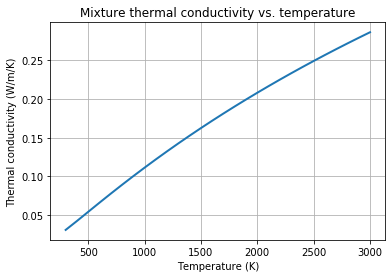

In [35]:
# plot mixture-averaged thermal conductivity as a function of temperature
fig, ax = plt.subplots()
ax.plot(Temp, kT, label='k',   lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Thermal conductivity (W/m/K)',
       title ='Mixture thermal conductivity vs. temperature')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("k_vs_T.pdf")

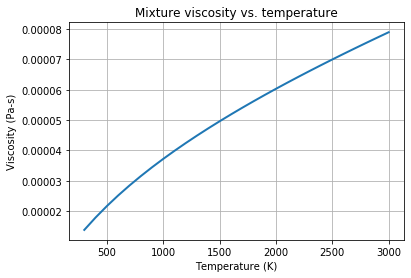

In [36]:
# plot mixture-averaged viscosity as a function of temperature
fig, ax = plt.subplots()
ax.plot(Temp, muT, label='mu',   lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Viscosity (Pa-s)',
       title ='Mixture viscosity vs. temperature')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("mu_vs_T.pdf")

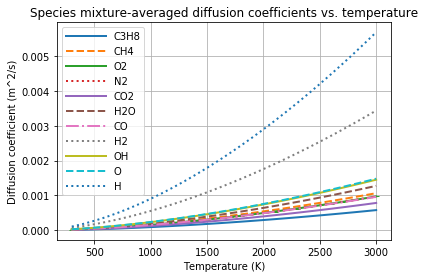

In [37]:
# plot species effective binary diffusion coefficients with respect to the mixture as functions of temperature
fig, ax = plt.subplots()
ax.plot(Temp, DimT[:,gas2.species_index('C3H8')], '-',  label='C3H8', lw=2)
ax.plot(Temp, DimT[:,gas2.species_index('CH4')],  '--', label='CH4',  lw=2)
ax.plot(Temp, DimT[:,gas2.species_index('O2')],   '_-', label='O2',   lw=2)
ax.plot(Temp, DimT[:,gas2.species_index('N2')],   ':',  label='N2',   lw=2)
ax.plot(Temp, DimT[:,gas2.species_index('CO2')],  '-',  label='CO2',  lw=2)
ax.plot(Temp, DimT[:,gas2.species_index('H2O')],  '--', label='H2O',  lw=2)
ax.plot(Temp, DimT[:,gas2.species_index('CO')],   '-.', label='CO',   lw=2)
ax.plot(Temp, DimT[:,gas2.species_index('H2')],   ':',  label='H2',   lw=2)
ax.plot(Temp, DimT[:,gas2.species_index('OH')],   '-',  label='OH',   lw=2)
ax.plot(Temp, DimT[:,gas2.species_index('O')],    '--', label='O',    lw=2)
ax.plot(Temp, DimT[:,gas2.species_index('H')],    ':',  label='H',    lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Diffusion coefficient (m^2/s)',
       title ='Species mixture-averaged diffusion coefficients vs. temperature')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Dim_vs_T.pdf")

The following two key observations can be made. First, for an ideal gas mixture, all of the molecular transport properties increase with increasing temperature. And second, for a given temperature, the species diffusion coefficients increase with decreasing species molecular weight.

Next, let's look at the pressure dependence.

In [38]:
# reset gas2
gas2.TPX = 300., ct.one_atm , np.ones(gas2.n_species)

In [39]:
# define arrays to hold the molecular transport properties as functions of temperature
Pres    = [0.1,1.0,10.0,100.0]                # pressures in atm
nP      = len(Pres)
kP      = np.zeros(nP)                        # mixture thermal conductivity
muP     = np.zeros(nP)                        # mixture viscosity
DimP    = np.zeros(shape=(nP,gas2.n_species)) # mixture-averaged species diffusion coefficients
rhoDimP = np.zeros(shape=(nP,gas2.n_species)) # product of mixture mass density times species diffusion coefficients

In [40]:
# compute and store the molecular transport coefficients as functions of pressure,
#   for a fixed mixture temperature and composition
for i, pres in enumerate(Pres):
    gas2.TP      = None , pres*ct.one_atm
    kP[i]        = gas2.thermal_conductivity
    muP[i]       = gas2.viscosity
    DimP[i,:]    = gas2.mix_diff_coeffs_mass
    rhoDimP[i,:] = gas2.density*gas2.mix_diff_coeffs_mass

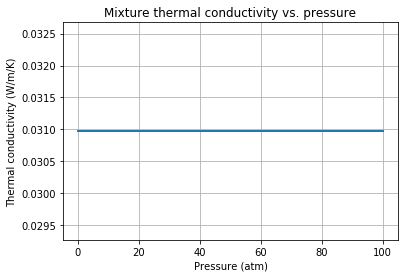

In [41]:
# plot mixture-averaged thermal conductivity as a function of pressure
fig, ax = plt.subplots()
ax.plot(Pres, kP, label='k',   lw=2)
ax.set(xlabel='Pressure (atm)',
       ylabel='Thermal conductivity (W/m/K)',
       title ='Mixture thermal conductivity vs. pressure')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("k_vs_P.pdf")

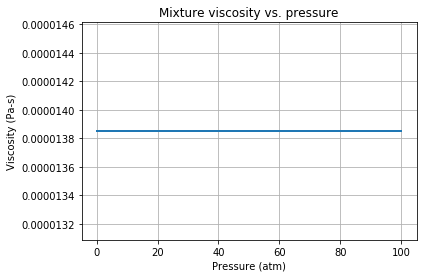

In [42]:
# plot mixture-averaged viscosity as a function of pressure
fig, ax = plt.subplots()
ax.plot(Pres, muP, label='mu',   lw=2)
ax.set(xlabel='Pressure (atm)',
       ylabel='Viscosity (Pa-s)',
       title ='Mixture viscosity vs. pressure')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("mu_vs_P.pdf")

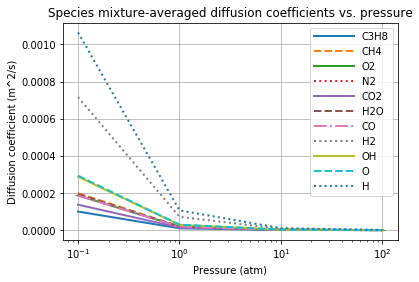

In [43]:
# plot species effective binary diffusion coefficients with respect to the mixture as functions of pressure
# use a log scale for pressure, to make the behavior more evident
fig, ax = plt.subplots()
ax.semilogx(Pres, DimP[:,gas2.species_index('C3H8')], '-',  label='C3H8', lw=2)
ax.semilogx(Pres, DimP[:,gas2.species_index('CH4')],  '--', label='CH4',  lw=2)
ax.semilogx(Pres, DimP[:,gas2.species_index('O2')],   '_-', label='O2',   lw=2)
ax.semilogx(Pres, DimP[:,gas2.species_index('N2')],   ':',  label='N2',   lw=2)
ax.semilogx(Pres, DimP[:,gas2.species_index('CO2')],  '-',  label='CO2',  lw=2)
ax.semilogx(Pres, DimP[:,gas2.species_index('H2O')],  '--', label='H2O',  lw=2)
ax.semilogx(Pres, DimP[:,gas2.species_index('CO')],   '-.', label='CO',   lw=2)
ax.semilogx(Pres, DimP[:,gas2.species_index('H2')],   ':',  label='H2',   lw=2)
ax.semilogx(Pres, DimP[:,gas2.species_index('OH')],   '-',  label='OH',   lw=2)
ax.semilogx(Pres, DimP[:,gas2.species_index('O')],    '--', label='O',    lw=2)
ax.semilogx(Pres, DimP[:,gas2.species_index('H')],    ':',  label='H',    lw=2)
ax.set(xlabel='Pressure (atm)',
       ylabel='Diffusion coefficient (m^2/s)',
       title ='Species mixture-averaged diffusion coefficients vs. pressure')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Dim_vs_P.pdf")

Thermal conductivity and viscosity are independent of mixture pressure, while species mixture-averaged diffusion coefficients decrease with increasing pressure. Let's look at the mixture mass density times the species diffusion coefficients:

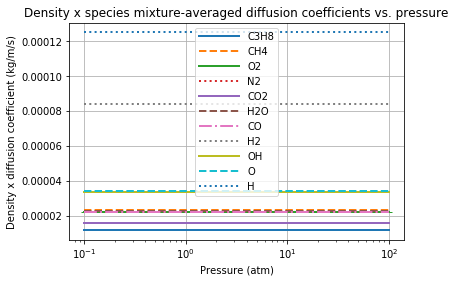

In [44]:
# plot density times species effective binary diffusion coefficients with respect to the mixture as functions of pressure
fig, ax = plt.subplots()
ax.semilogx(Pres, rhoDimP[:,gas2.species_index('C3H8')], '-',  label='C3H8', lw=2)
ax.semilogx(Pres, rhoDimP[:,gas2.species_index('CH4')],  '--', label='CH4',  lw=2)
ax.semilogx(Pres, rhoDimP[:,gas2.species_index('O2')],   '_-', label='O2',   lw=2)
ax.semilogx(Pres, rhoDimP[:,gas2.species_index('N2')],   ':',  label='N2',   lw=2)
ax.semilogx(Pres, rhoDimP[:,gas2.species_index('CO2')],  '-',  label='CO2',  lw=2)
ax.semilogx(Pres, rhoDimP[:,gas2.species_index('H2O')],  '--', label='H2O',  lw=2)
ax.semilogx(Pres, rhoDimP[:,gas2.species_index('CO')],   '-.', label='CO',   lw=2)
ax.semilogx(Pres, rhoDimP[:,gas2.species_index('H2')],   ':',  label='H2',   lw=2)
ax.semilogx(Pres, rhoDimP[:,gas2.species_index('OH')],   '-',  label='OH',   lw=2)
ax.semilogx(Pres, rhoDimP[:,gas2.species_index('O')],    '--', label='O',    lw=2)
ax.semilogx(Pres, rhoDimP[:,gas2.species_index('H')],    ':',  label='H',    lw=2)
ax.set(xlabel='Pressure (atm)',
       ylabel='Density x diffusion coefficient (kg/m/s)',
       title ='Density x species mixture-averaged diffusion coefficients vs. pressure')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("rhoDim_vs_P.pdf")

The product of mixture mass density times species mixture-averaged diffusion coefficient is independent of pressure.

## 5. Dimensionless parameters: Prandtl and Lewis numbers

Two key dimensionless parameters that quantify the relative rates at which different physical quantities are transported by molecular motion are the Prandtl number and the Lewis number. The latter is especially important in combustion, for reasons that will be discussed as we proceed through Chapter 7. One can define these dimensionless quantities based on individual species transport coefficients, or based on mixture-averaged transport coefficients. For our purposes, it will be most useful to work with mixture-averaged thermal conductivity and viscosity and with individual species mixture-averaged diffusion coefficients. In that case, there is a single Prandtl number ($Pr$) that characterizes the mixture, and $N_{spec}$ different Lewis numbers, one for each species ($Le_i$). These quantities are defined as follows:

$$ Pr \equiv \frac{\mu c_p}{k} $$

$$ Le _ i \equiv \frac{k}{\rho c_p \mathcal D_{im}} $$

where $\rho$ is the mixture mass density (kg/m^3) and $c_p$ is the mixture-averaged constant-pressure specific heat (J/kg-K). We again work with gas2 ("Mix" transport model).

In [45]:
# reset gas2
gas2.TPX = 300., ct.one_atm , np.ones(gas2.n_species)

In [46]:
# define arrays to hold dimensionless quantitites as functions of temperature
Temp = np.arange(gas2.min_temp,gas2.max_temp+1.,100.)
nT   = len(Temp)
PrT  = np.zeros(nT)                        # mixture Prandtl number
LeiT = np.zeros(shape=(nT,gas2.n_species)) # species Lewis numbers

In [47]:
# compute and store the dimensionless quantitites as functions of temperature,
#   for a fixed mixture pressure and composition
for i, temp in enumerate(Temp):
    gas2.TP   = temp , None
    PrT[i]    = gas2.cp*gas2.viscosity / gas2.thermal_conductivity
    LeiT[i,:] = gas2.thermal_conductivity / ( gas2.density*gas2.mix_diff_coeffs_mass*gas2.cp )

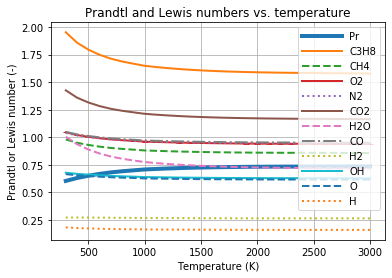

In [48]:
# plot Prandtl and Lewis numbers as functions of temperature
fig, ax = plt.subplots()
ax.plot(Temp, PrT,                                '-',  label='Pr', lw=4)
ax.plot(Temp, LeiT[:,gas2.species_index('C3H8')], '-',  label='C3H8', lw=2)
ax.plot(Temp, LeiT[:,gas2.species_index('CH4')],  '--', label='CH4',  lw=2)
ax.plot(Temp, LeiT[:,gas2.species_index('O2')],   '_-', label='O2',   lw=2)
ax.plot(Temp, LeiT[:,gas2.species_index('N2')],   ':',  label='N2',   lw=2)
ax.plot(Temp, LeiT[:,gas2.species_index('CO2')],  '-',  label='CO2',  lw=2)
ax.plot(Temp, LeiT[:,gas2.species_index('H2O')],  '--', label='H2O',  lw=2)
ax.plot(Temp, LeiT[:,gas2.species_index('CO')],   '-.', label='CO',   lw=2)
ax.plot(Temp, LeiT[:,gas2.species_index('H2')],   ':',  label='H2',   lw=2)
ax.plot(Temp, LeiT[:,gas2.species_index('OH')],   '-',  label='OH',   lw=2)
ax.plot(Temp, LeiT[:,gas2.species_index('O')],    '--', label='O',    lw=2)
ax.plot(Temp, LeiT[:,gas2.species_index('H')],    ':',  label='H',    lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Prandtl or Lewis number (-)',
       title ='Prandtl and Lewis numbers vs. temperature')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("PrLe_vs_T.pdf")

In [49]:
# print the array of Prandtl number as a function of temperature
PrT

array([0.60458012, 0.63116864, 0.65162609, 0.66855832, 0.68199173,
       0.69228224, 0.70051728, 0.70853146, 0.71323816, 0.71730654,
       0.72077892, 0.72369747, 0.72611491, 0.72812825, 0.72977886,
       0.73111185, 0.73217198, 0.73300273, 0.73364562, 0.7341397 ,
       0.73452118, 0.73482312, 0.73507515, 0.73530336, 0.73553005,
       0.73577364, 0.73604852, 0.73636496])

The mixture Prandtl number and the species Lewis numbers are relatively weak functions of temperature, with most of the temperature variation being at lower temperatures. In particular, the mixture Prandtl number is approximately 0.74 for temperatures greater than 1000 K.

Species Lewis numbers are less than one for low-molecular-weight species (especially H and H2) and are greater than one for high-molecular-weight species. This is consistent with the trends noted earlier for the $ \mathcal D _ {im} $'s.

Now let's look at the pressure dependence:

In [50]:
# reset gas2
gas2.TPX = 300., ct.one_atm , np.ones(gas2.n_species)

In [51]:
# define arrays to hold dimensionless quantitites as functions of pressure
Pres = [0.1,1.0,10.0,100.0]
nP   = len(Pres)
PrP  = np.zeros(nP)
LeiP = np.zeros(shape=(nP,gas2.n_species))

In [52]:
# compute and store the dimensionless quantitites as functions of pressure,
#   for a fixed mixture temperature and composition
for i, pres in enumerate(Pres):
    gas2.TP   = None , pres*ct.one_atm
    PrP[i]    = gas2.cp*gas2.viscosity / gas2.thermal_conductivity
    LeiP[i,:] = gas2.thermal_conductivity / ( gas2.density*gas2.mix_diff_coeffs_mass*gas2.cp )

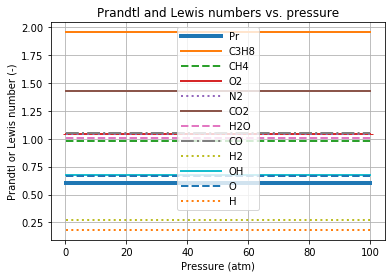

In [53]:
# plot Prandtl and Lewis numbers as functions of pressure
fig, ax = plt.subplots()
ax.plot(Pres, PrP,                                '-',  label='Pr',   lw=4)
ax.plot(Pres, LeiP[:,gas2.species_index('C3H8')], '-',  label='C3H8', lw=2)
ax.plot(Pres, LeiP[:,gas2.species_index('CH4')],  '--', label='CH4',  lw=2)
ax.plot(Pres, LeiP[:,gas2.species_index('O2')],   '_-', label='O2',   lw=2)
ax.plot(Pres, LeiP[:,gas2.species_index('N2')],   ':',  label='N2',   lw=2)
ax.plot(Pres, LeiP[:,gas2.species_index('CO2')],  '-',  label='CO2',  lw=2)
ax.plot(Pres, LeiP[:,gas2.species_index('H2O')],  '--', label='H2O',  lw=2)
ax.plot(Pres, LeiP[:,gas2.species_index('CO')],   '-.', label='CO',   lw=2)
ax.plot(Pres, LeiP[:,gas2.species_index('H2')],   ':',  label='H2',   lw=2)
ax.plot(Pres, LeiP[:,gas2.species_index('OH')],   '-',  label='OH',   lw=2)
ax.plot(Pres, LeiP[:,gas2.species_index('O')],    '--', label='O',    lw=2)
ax.plot(Pres, LeiP[:,gas2.species_index('H')],    ':',  label='H',    lw=2)
ax.set(xlabel='Pressure (atm)',
       ylabel='Prandtl or Lewis number (-)',
       title ='Prandtl and Lewis numbers vs. pressure')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("PrLe_vs_P.pdf")

The dimensionless transport parameters are independent of pressure.

## 6. Differential species diffusion and nonunity Lewis numbers

*Differential diffusion* refers to the fact that different species diffuse at different rates in a gas mixture. As we have seen, the species diffusion coefficient generally increases (faster diffusion) with decreasing species molecular weight. 

For low-molecular-weight species, the species Lewis number is less than one (species diffusion is faster than molecular transport of heat) while for high-molecular-weight species, the species Lewis number is greater than one (species diffusion is slower than molecular transport of heat). As we will see later in Chapter 7, the energy equation governing a chemically reacting gas mixture is often written as an equation for the standardized mixture enthalpy, and that equation simplifies considerably in the case where all species Lewis numbers are equal to one. We will often invoke the unity-Lewis-number simplification as we progress in our study of combustion, especially for purposes of developing simplified analytic theories that capture the essential features of flames. As we have just seen, the most significant departures from unity Lewis number tend to be for very-low-molecular-weight and for very-high-molecular-weight species. There are phenomena where consideration of nonunity Lewis numbers is essential, especially in aspects of flame stability for premixed flames, but in most cases, nonunity Lewis number effects will be of secondary importance in our introductory discussion of combustion.

When we get to Chapters 8 and 9 of Turns 4th ed. (laminar premixed flames and laminar diffusion flames, respectively), we will look at the influence of the choice of species diffusion model on flame structure using Cantera.